<a href="https://colab.research.google.com/github/shaifali1102/Supervised-Learning/blob/main/DecisionTrees_Practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

- decision based tree structure(if-else)
    - top node - root node
    - bottom most nodes - leaf nodes
    - nodes in between - internal/decision nodes
- logically, it is combination of if-else statements
- geometrically, it is combination of axis parallel hyperplanes
    - this helps is classifying non-linear data
    - the final decision boundary which is made out of combining these hyperplanes need not be axis parallel
- training in DTs
    - we try to split data into homogenous region/subspaces containing only single class
- categorical features are encoded
    - Binary Encoding(0/1): Features with only 2 unique values
    - Label Encoding(0,1,2,3..): More than 2 unique values, having a particular order
    - One Hot Encoding([0,0,0,1]..): More than 2 unique values having no order
    - Target Encoding([0.1, 0.33,..]): Features with a lot of unique values having no order
- Advantages
    - easily interpretable
- Purity of a node = homogenousity of the data
    - The purer the node, more the probability of the datapoints belonging to one class
- Quanitfy purity
    1. **Entropy** - measures the impurity of the node
        - purer nodes have a low entropy
  $$
  H(y) = - \sum_{i=1}^{k} p(y_i) \log p(y_i)
  $$
        - For binary classification
  $$
  H(y) = - [p \log_2 p + (1-p) \log_2 (1-p)]
  $$
        - Entropy is max when node is impure,
            - $P(y=1) = 0.5, H(y) = 1$
        - Entropy is min when node is pure
            - $H(y) = 0$
        - $H(y) \in [0, 1]$
        - **Total Entropy** after a split is taken as weighted avg of child entropies because each child node represents a different proportion of the total data from its parent node
  $$
  H(children) = -[ \frac {n_1}{n} H(C_1) + \frac {n_2}{n} H(C_2) ]
  $$
        - **Information Gain**
  $$
  IG = H(Parent) - H(children)
  $$
        - we pick a feature to split on when it gives us maximum information gain and mminimum entropy
        - we split until we get pure nodes
        - Calculating entropy is computationally expensive and time consuming
            - we take log of probability at each node for each feature
    2. **Gini Impurity**
        - also a measure of impurity
  $$
  GI(y) = 1 - \sum_{i=1}^{k} p(y_i)^2
  $$
        - $GI(y) \in [0,0.5]$
        - Information Gain
  $$
  IG = GI_{parent~node} - Weighted~GI_{child~nodes}
  $$

- Split on numerical values
    - using binning
    - eg. Age can be grouped within range [20,60]
    - Bins: [20, 30), [30, 40), [40, 50), [50, 60]
- Bias-Variance TradeOff
    - Deep Tree: depth is more
        - low bias & high variance, DT overfits
        - prune tree/ reduce depth to avoid overfitting
    - Shallow Tree: depth is small
        - high bias & low variance, DT underfits
        - increase depth to avoid underfitting
- Hyperparameters
    1. ***criterion***: which impurity to use, default = Gini impurity
    2. ***max_depth***: max depth allowed for the DT, deafult = None(until all leaves are pure)
    3. ***min_samples_split***: min no. of datapoints required to split further, healps control depth of DT, default = 2
    4. ***min_samples_leaf***: min. no. of samples a leaf node can have.
    5. ***max_leaf_nodes***: max. no. of leaf nodes the DT can have, default = None
    6. ***max_features***: selects features to be used for splitting, default = None(all features are used)
    7. ***class_weight***: assign weights to different classes for training, used to handle imbalanced data, default = None
- **Feature scaling** is not required in DTs as the impurity measure is dependent on the number of samples after a split and not the values.
- **Curse of dimensionality** affects DTs
    - with lots of features, DT will check every possible split to calculate entropy, training time for DT increases
    - Other algos like Random Forest, GBDT ensemble models can be used
- **Data Imbalance** in DTs
    - model may try to prioritize to classify the majority class leading to poor performance of the minority class
    - data can be balanced by using:
        - class weights
        - oversampling minority class
        - undersampling majority class
        - SMOTE
- **Feature Importance**
    - calculated using normalized Information Gain
  $$
  FI(f_i) = IG_1 * \frac{n_1}{n} + IG_2 * \frac{n_2}{n} + ...
  $$
where $IG_1, IG_2, ...$ are information gains from first split, second split and so on.
- **Regression using DTs**
    - impurity is measured using MSE
  $$
  MSE_{node} = \frac{1}{n_1} \sum_{i=1}^{n_1} (y^i - \bar{y})^2
  $$
    - both entropy and gini impurity work with probablities to calculate impurity and regression doesn't have probabilites, therefore we use MSE







## Airtel Case Study

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!gdown 16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk

Downloading...
From: https://drive.google.com/uc?id=16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
To: /content/HR-Employee-Attrition.csv
100% 228k/228k [00:00<00:00, 13.0MB/s]


In [4]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Problem Statement

- Rise in employee Attrition in Airtel
- Identify employees who may leave in future
- Identify key indicators/factors leading to an employee leaving

In [5]:
df.shape

(1470, 35)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

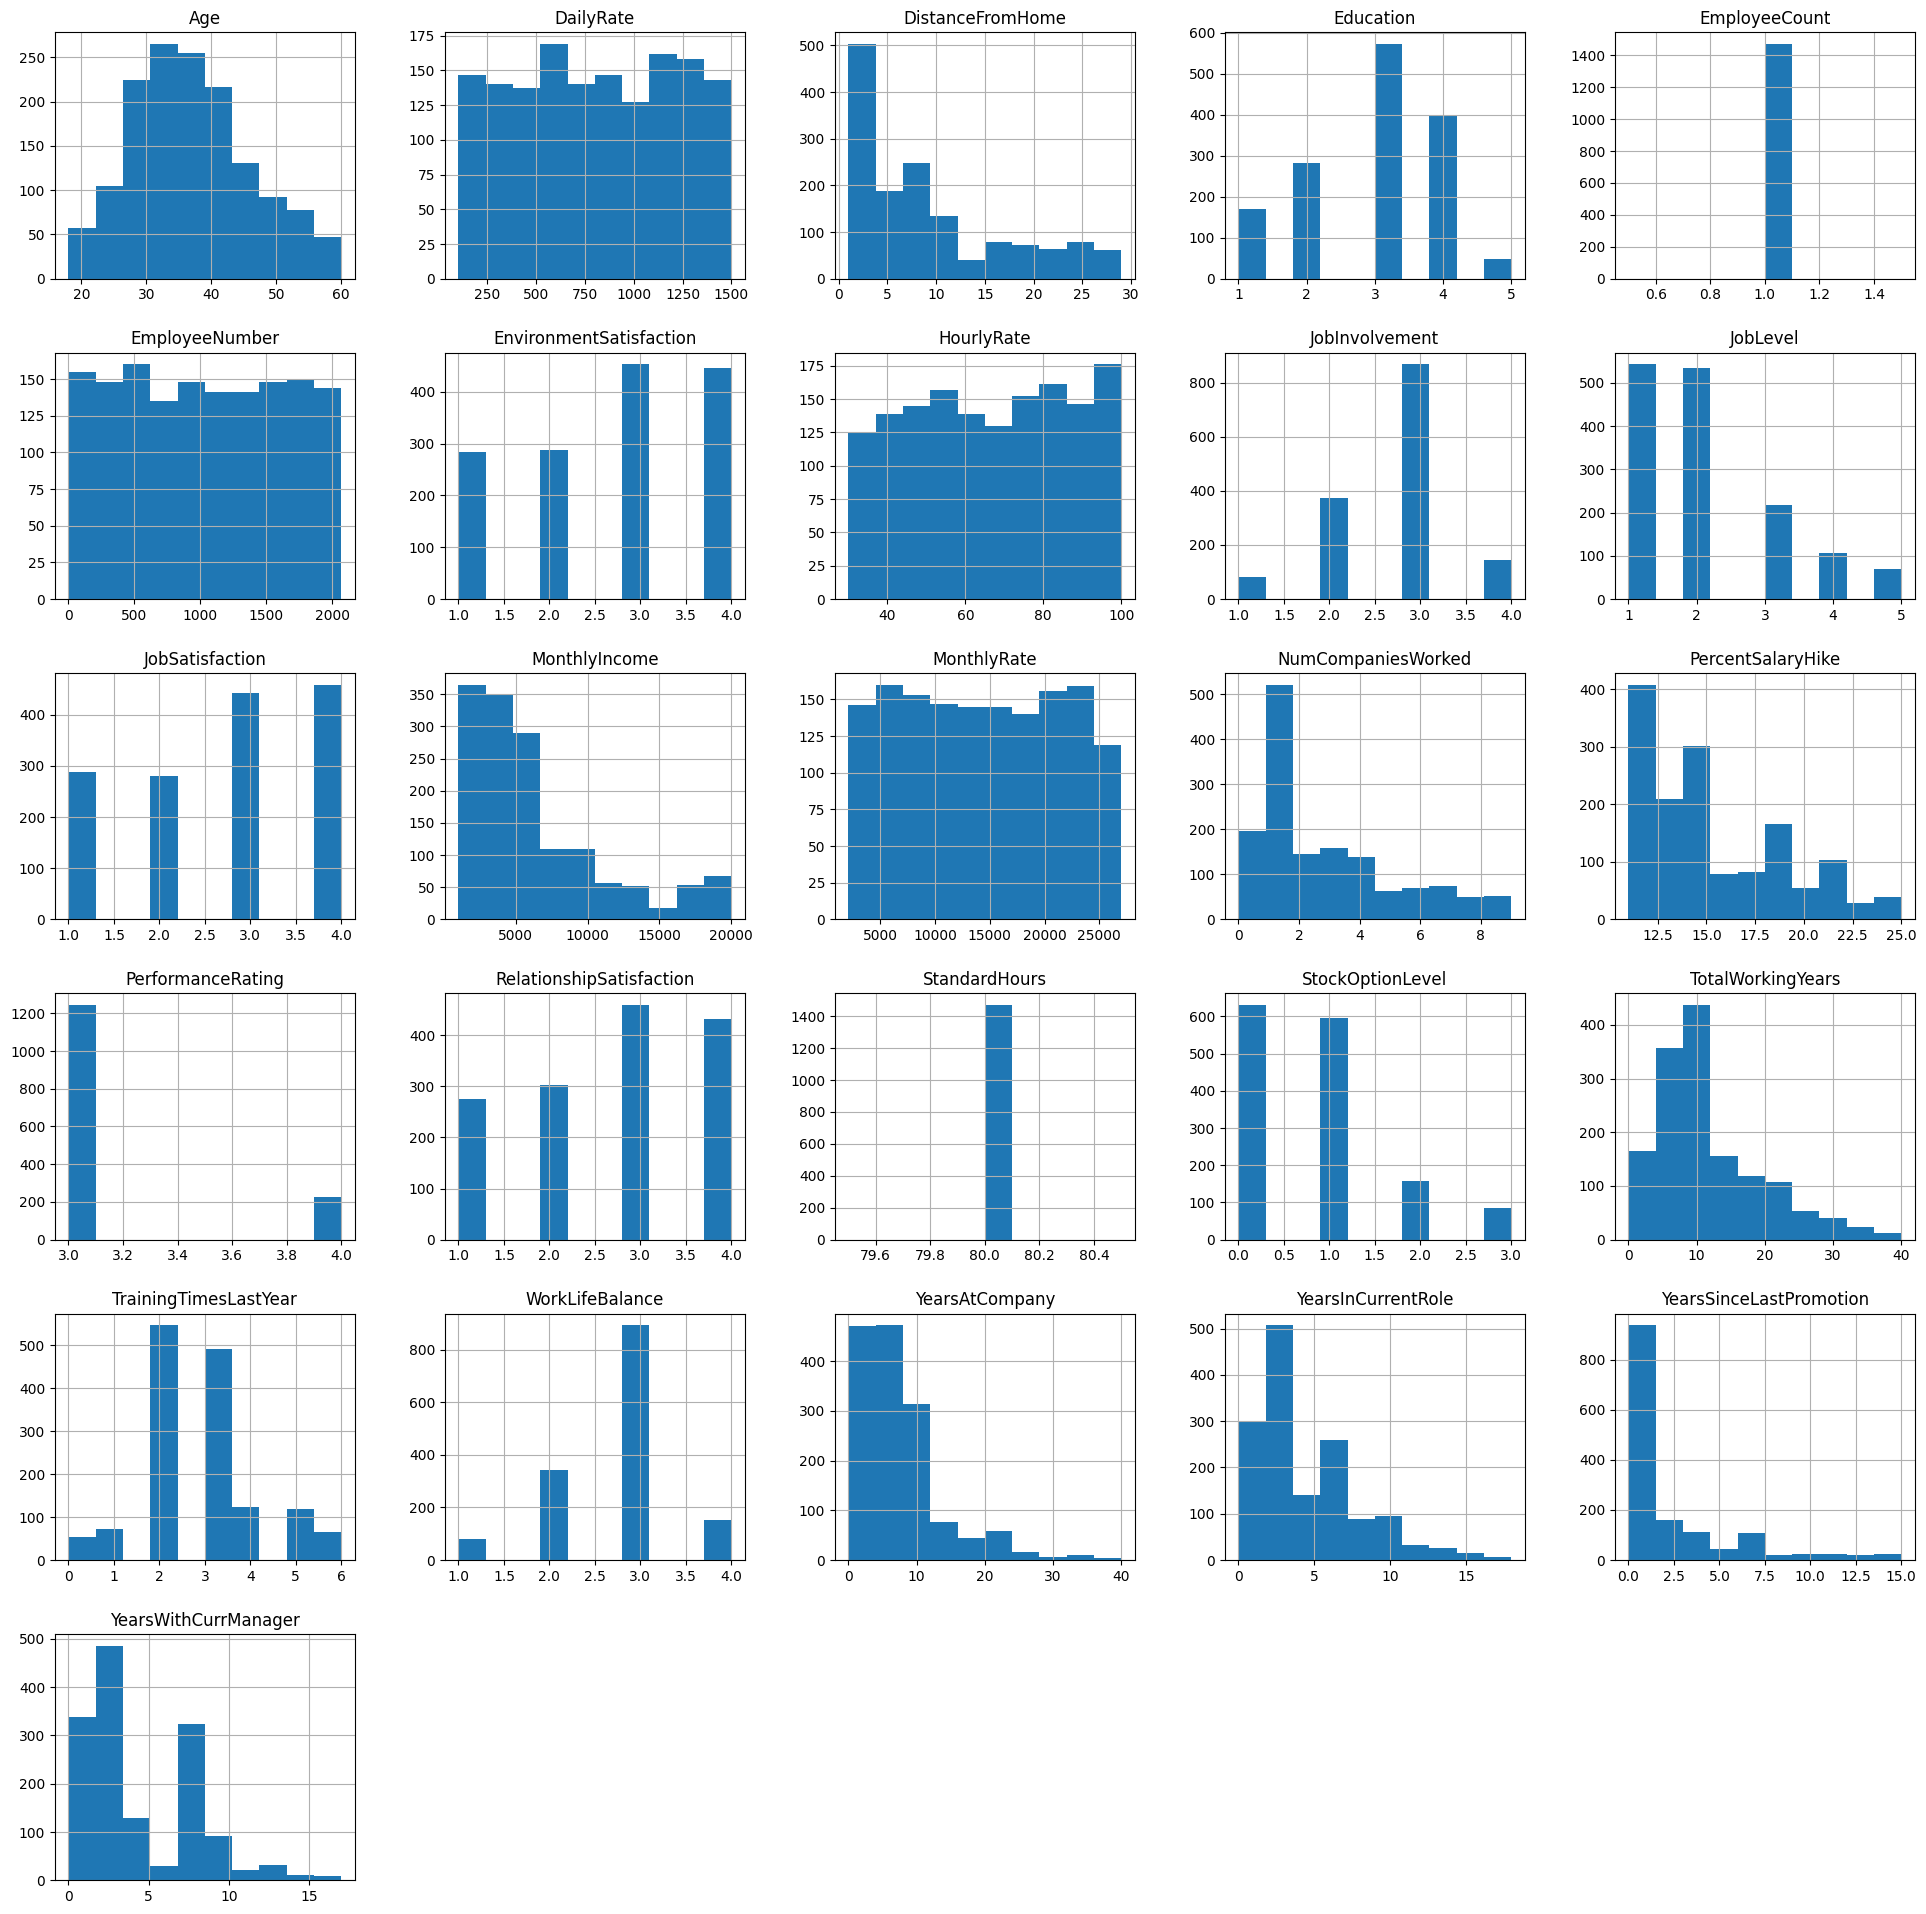

In [7]:
#Distribution of features

df.hist(figsize = (24,24))
plt.show()

#### Observations

- lot of attributes are right-skewed like DistanceFromHome, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike etc
- Some attributes have normal distribution like Age, HourlyRate, MonthlyRate
- Some features are either constant or are uniformly distributed like EmployeeCount, StandardHours, EmployeeNumber. These features are not useful and can be dropped.
- Some features are categorical like Education, JobLevel, StockOptionLevel etc. These can be encoded.

In [8]:
# Dropping features that will not contribute to our analysis

df.drop(['EmployeeCount','StandardHours','EmployeeNumber','Over18'], axis=1, inplace=True)

In [9]:
# Encoding categorical features based on number of unique values.

for col in df.columns:
  if df[col].dtype == 'object':
    print(col, df[col].nunique())


Attrition 2
BusinessTravel 3
Department 3
EducationField 6
Gender 2
JobRole 9
MaritalStatus 3
OverTime 2


1. Binary Encoding: 2 unique values - Attrition, Gender, OverTime
2. One Hot Encoding: < 6 unique values - Business Travel, Department, Marital Status
3. Target Encoding: > 6 unique values - EducationField, JobRole

In [10]:
# LabelEncoding
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

cols = ['Attrition','Gender','OverTime']
for col in cols:
  le.fit(df[col])
  df[col] = le.transform(df[col])
  print(col, df[col].unique())

Attrition [1 0]
Gender [0 1]
OverTime [1 0]


In [11]:
# OneHotEncoding
df = pd.get_dummies(df, columns = ["BusinessTravel", "Department", "MaritalStatus"], dtype=int, drop_first = True)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,Life Sciences,2,0,94,3,...,6,4,0,5,0,1,0,1,0,1
1,49,0,279,8,1,Life Sciences,3,1,61,2,...,10,7,1,7,1,0,1,0,1,0
2,37,1,1373,2,2,Other,4,1,92,2,...,0,0,0,0,0,1,1,0,0,1
3,33,0,1392,3,4,Life Sciences,4,0,56,3,...,8,7,3,0,1,0,1,0,1,0
4,27,0,591,2,1,Medical,1,1,40,3,...,2,2,2,2,0,1,1,0,1,0


Target Feature is Attrition

In [12]:
y = df['Attrition']
df.drop(['Attrition'], axis=1, inplace=True)
y.value_counts()

,count
Attrition,
0,1233
1,237


#### Observation
- dataset is imbalanced
- we will perform SMOTE to training set

## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

# perform stratification on y to keep it balanced between training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1102, 33) (1102,)
(368, 33) (368,)


### Target Encoding

Performing target encoding for EducationField and JobRole

In [14]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.9 MB/s eta 0:00:00


In [15]:
from category_encoders import TargetEncoder

te = TargetEncoder(cols=['EducationField','JobRole'])
X_train = te.fit_transform(X_train, y_train)
X_test = te.transform(X_test)
print(X_train[['EducationField','JobRole']][:5])

      EducationField   JobRole
22          0.152125  0.020398
74          0.152125  0.263682
1339        0.152125  0.129187
251         0.198194  0.050037
1182        0.139535  0.066055


### SMOTE for class imbalance

In [16]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

print(X_train.shape, y_train.shape)

(1848, 33) (1848,)


In [17]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,34,419,7,4,0.152125,1,0,53,3,3,...,12,6,2,11,0,1,1,0,0,1
1,36,132,6,3,0.152125,2,0,55,4,1,...,1,0,0,0,0,1,1,0,1,0
2,22,391,7,1,0.152125,4,1,75,3,1,...,1,0,0,0,0,1,1,0,0,1
3,39,505,2,4,0.198194,3,0,64,3,3,...,19,6,11,8,1,0,1,0,0,1
4,36,894,1,4,0.139535,4,0,33,2,2,...,3,2,1,2,0,0,1,0,1,0


## Implementing Descision Trees

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42,criterion='entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [19]:
# Train-Test score
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

1.0
0.7336956521739131


[Text(0.3797477893890675, 0.9666666666666667, 'x[10] <= 0.129\nentropy = 1.0\nsamples = 1848\nvalue = [924, 924]'),
 Text(0.0994774919614148, 0.9, 'x[29] <= 0.5\nentropy = 0.774\nsamples = 654\nvalue = [505, 149]'),
 Text(0.23961264067524116, 0.9333333333333333, 'True  '),
 Text(0.01929260450160772, 0.8333333333333334, 'x[10] <= 0.066\nentropy = 0.918\nsamples = 96\nvalue = [32, 64]'),
 Text(0.012861736334405145, 0.7666666666666667, 'x[10] <= 0.064\nentropy = 0.867\nsamples = 45\nvalue = [32.0, 13.0]'),
 Text(0.006430868167202572, 0.7, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.01929260450160772, 0.7, 'x[8] <= 1.5\nentropy = 0.503\nsamples = 36\nvalue = [32, 4]'),
 Text(0.012861736334405145, 0.6333333333333333, 'x[26] <= 8.0\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.006430868167202572, 0.5666666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.01929260450160772, 0.5666666666666667, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.0257234

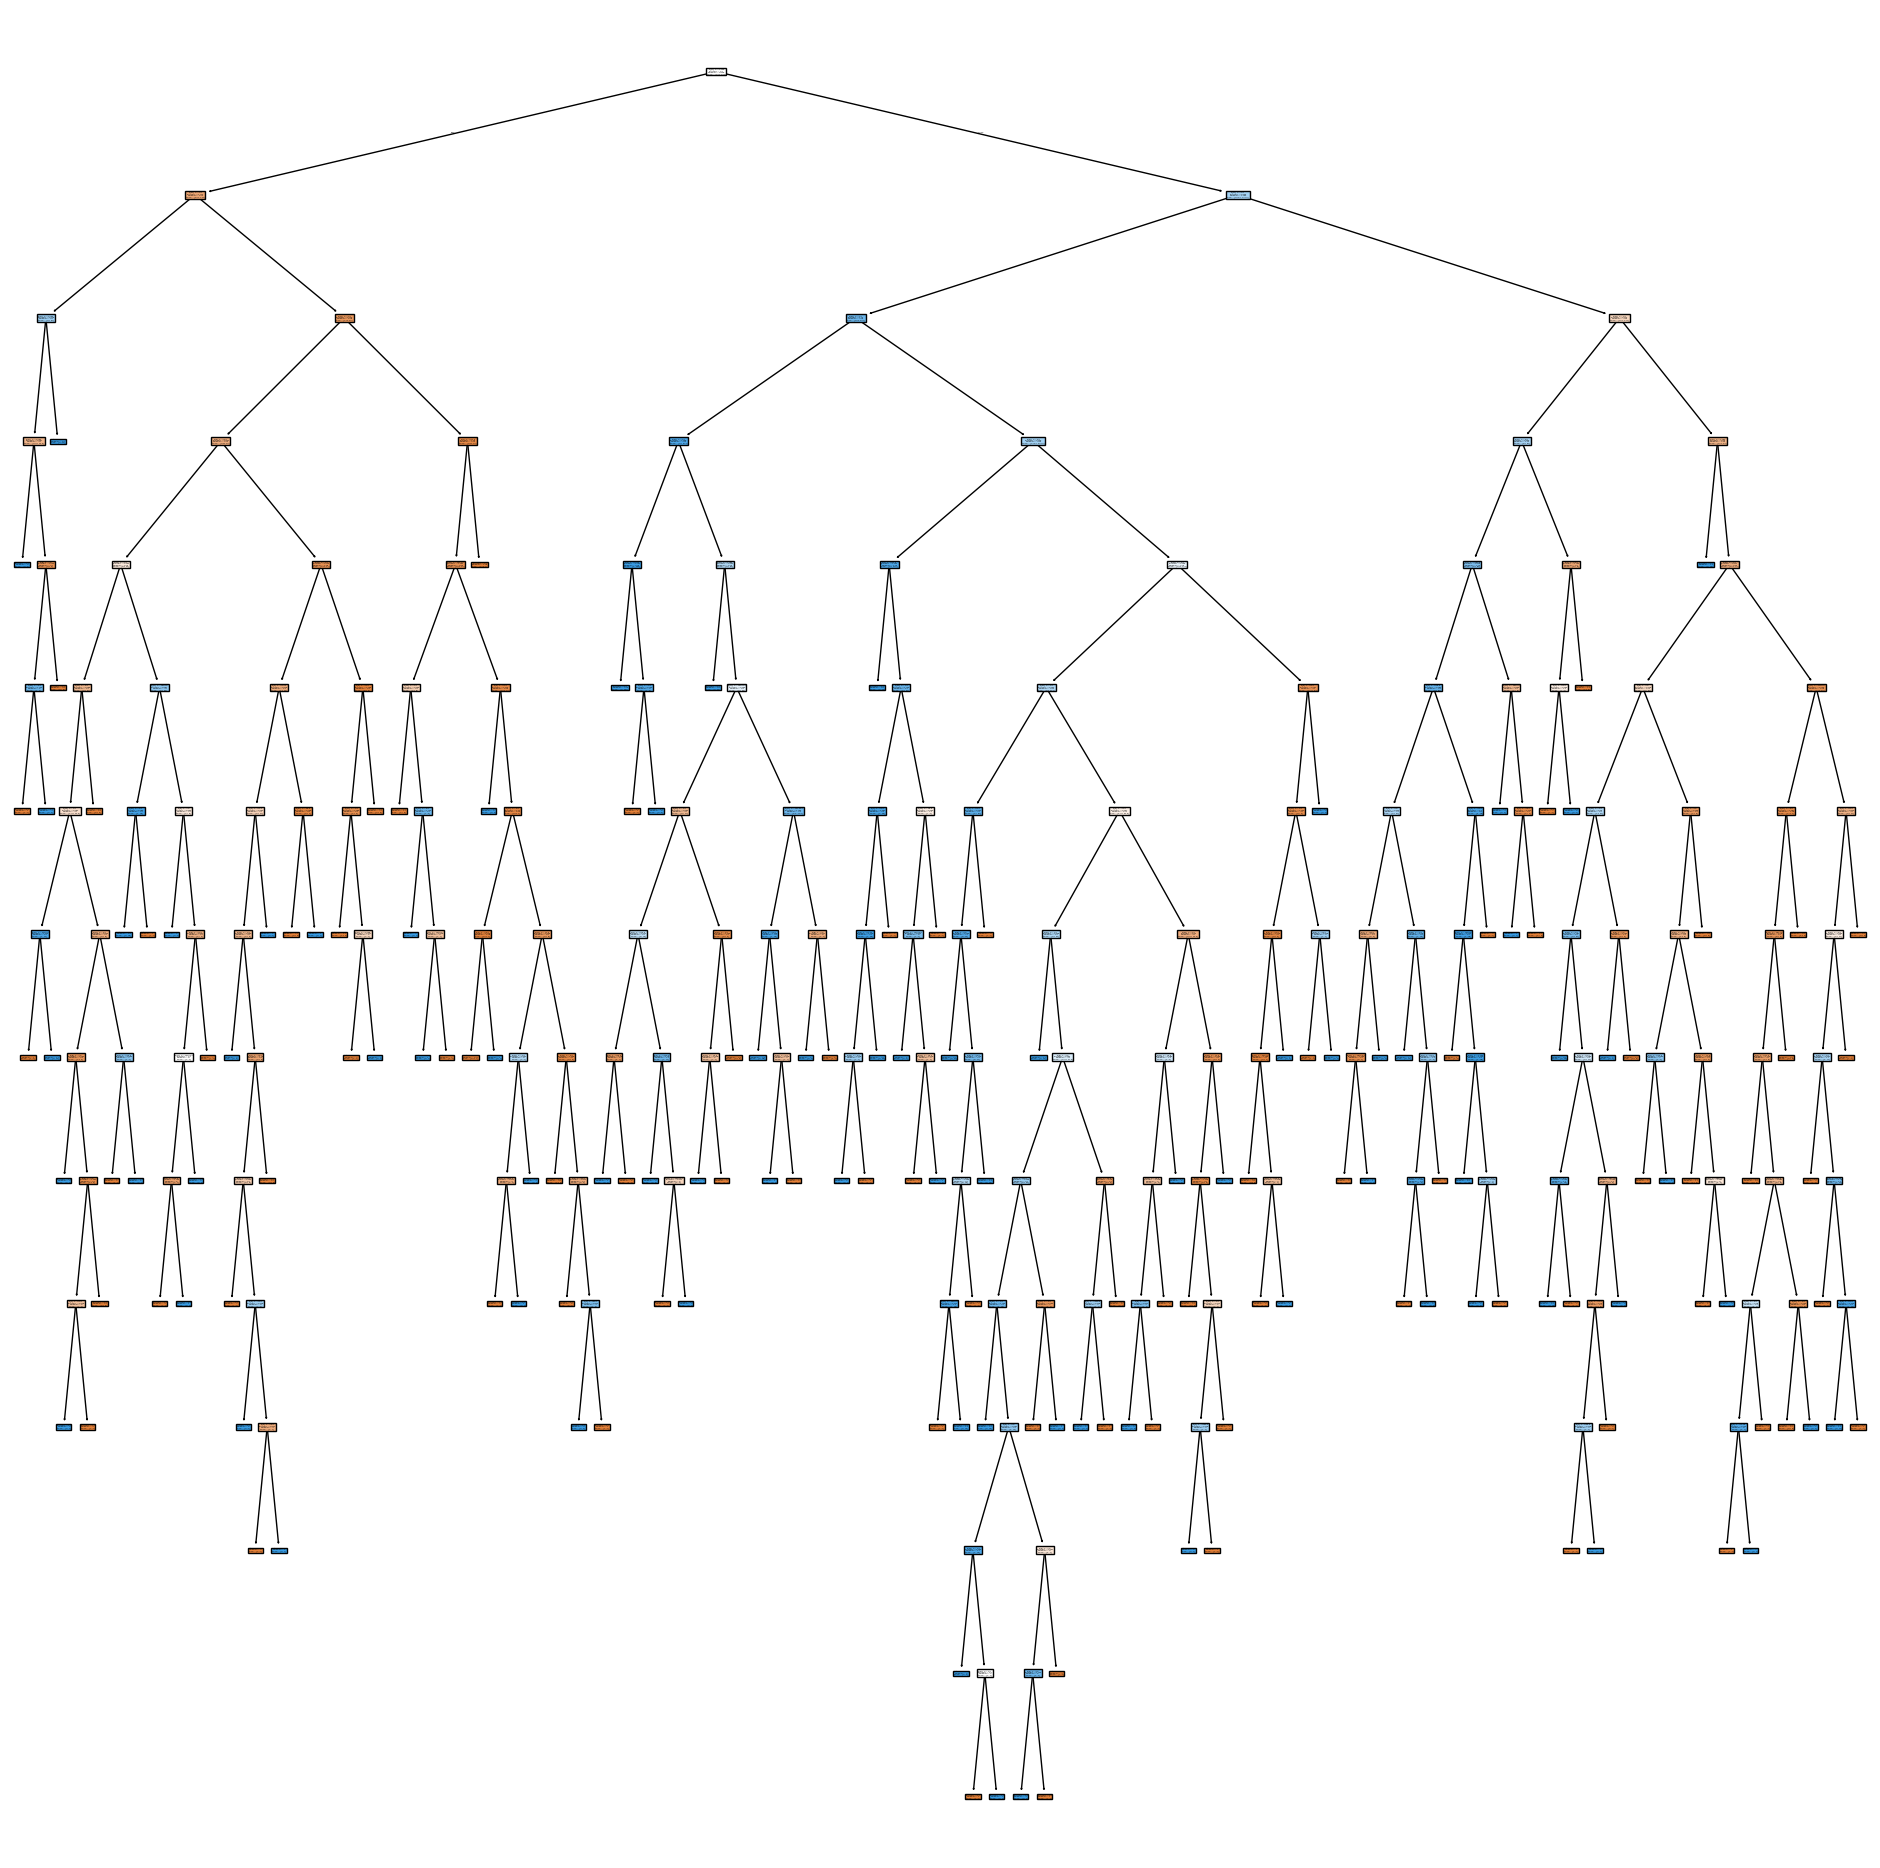

In [21]:
# Visualizing

from sklearn.tree import plot_tree
plt.figure(figsize=(24,24))
plot_tree(dt, filled=True)
plt.show()

The model scores perfectly while training but heavily underperforms when testing. The model is overfitting. We can prevent overfitting by reducing the depth of the DT

### Hyperparameter tuning using KFold

In [22]:
# Hyperparameter tuning with depth of the DT

from sklearn.model_selection import KFold, cross_validate, cross_val_score

kfold = KFold(n_splits = 10)

depths = [3,4,5,6,7,8,9,10,13,15]

for depth in depths:
  dt_kf = DecisionTreeClassifier(random_state=42,max_depth=depth)
  cv_results = cross_validate(dt_kf, X_train, y_train, cv=kfold, scoring='accuracy', return_train_score=True)

  print(f'Depth: {depth}')
  print(f'Accuracy Mean: {cv_results['train_score'].mean()*100} Validation: {cv_results['test_score'].mean()*100}')
  print(f'Accuracy Std: {cv_results['train_score'].std()*100} Validation: {cv_results['test_score'].std()*100}')
  print('***************************')

Depth: 3
Accuracy Mean: 79.00443475646422 Validation: 76.30904817861341
Accuracy Std: 0.6081146662605599 Validation: 6.702829707430917
***************************
Depth: 4
Accuracy Mean: 82.75011636176511 Validation: 78.03730904817861
Accuracy Std: 0.6401216942501302 Validation: 5.682307285960468
***************************
Depth: 5
Accuracy Mean: 85.87673169434294 Validation: 78.79553466509988
Accuracy Std: 0.8775733823317139 Validation: 4.933319617670566
***************************
Depth: 6
Accuracy Mean: 89.65253726467462 Validation: 83.34136310223266
Accuracy Std: 0.7455600765246987 Validation: 6.39872703098704
***************************
Depth: 7
Accuracy Mean: 92.68880238447662 Validation: 83.01527614571093
Accuracy Std: 0.49146338417322133 Validation: 6.525892855786582
***************************
Depth: 8
Accuracy Mean: 95.38839533512188 Validation: 83.28877790834312
Accuracy Std: 0.36099780642106416 Validation: 7.904066478653165
***************************
Depth: 9
Accuracy Mea

In [26]:
# training with best params
dt = DecisionTreeClassifier(random_state=42, max_depth=4)
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.8322510822510822
0.779891304347826


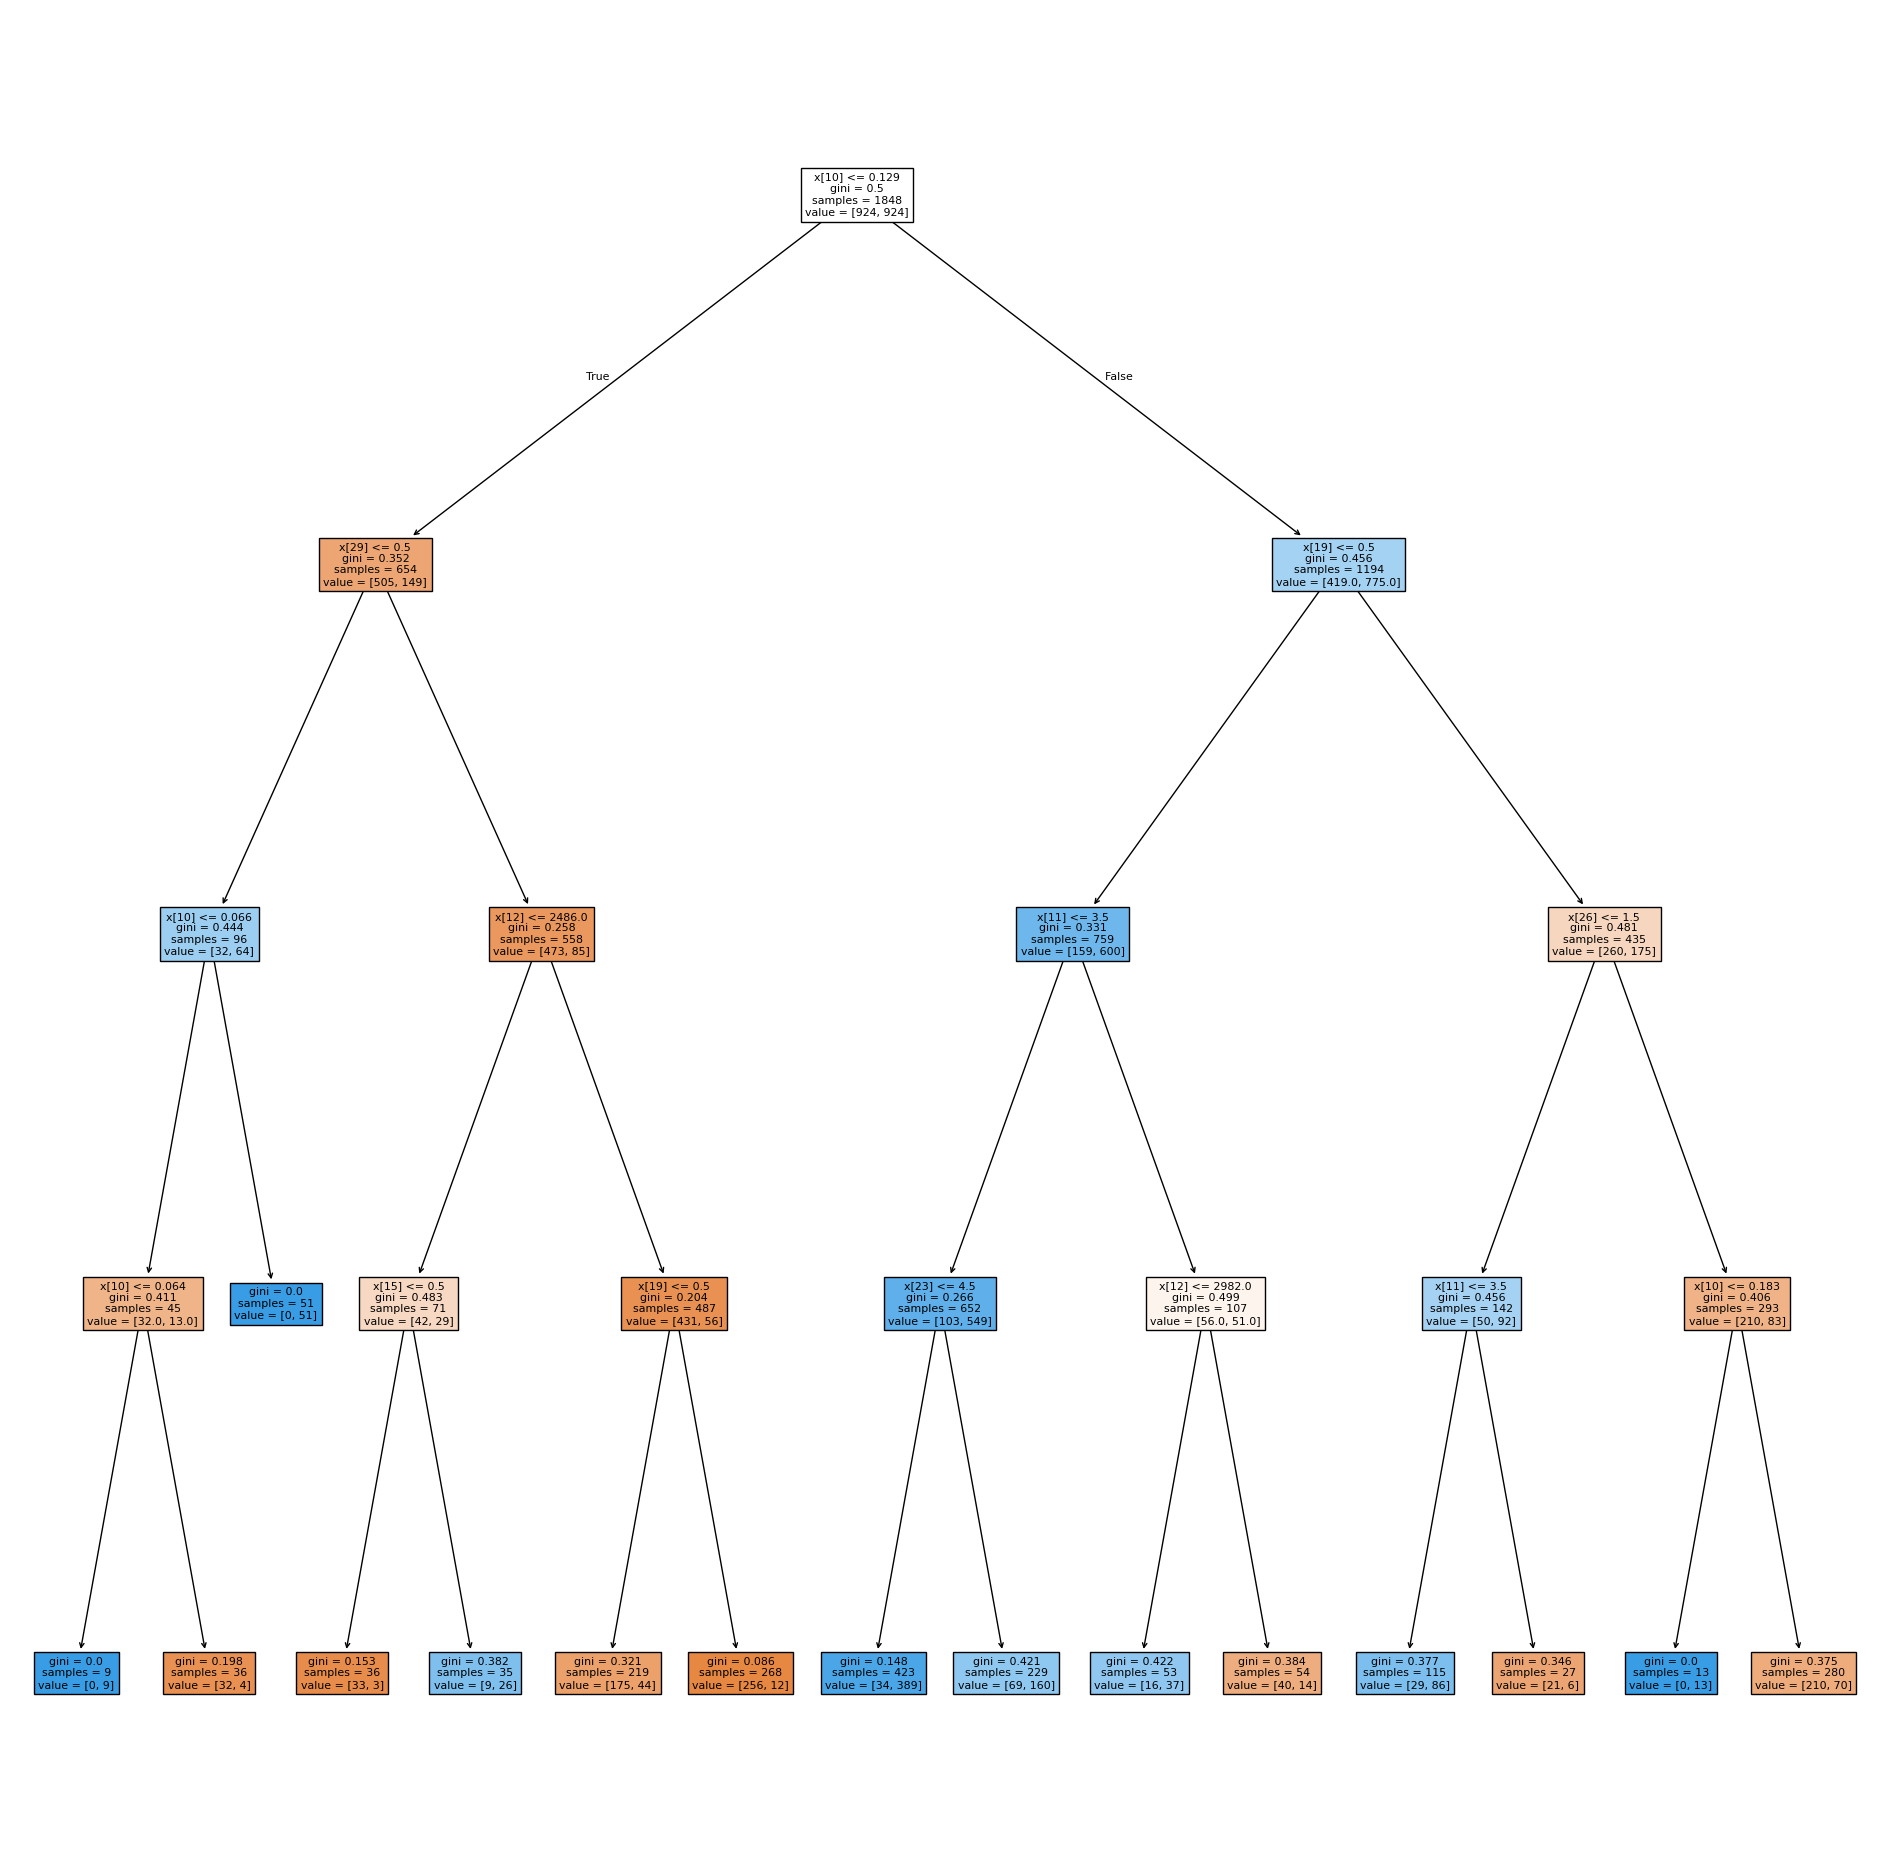

In [25]:
plt.figure(figsize=(24,24))
plot_tree(dt, filled=True)
plt.show()

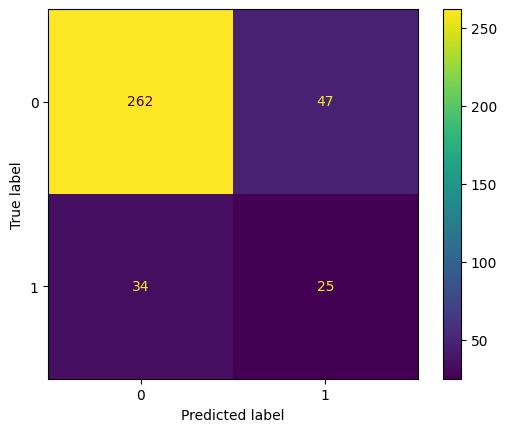

In [27]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()
plt.show()

Model classified Attrition=0 quite well but there's a high number of FN as well

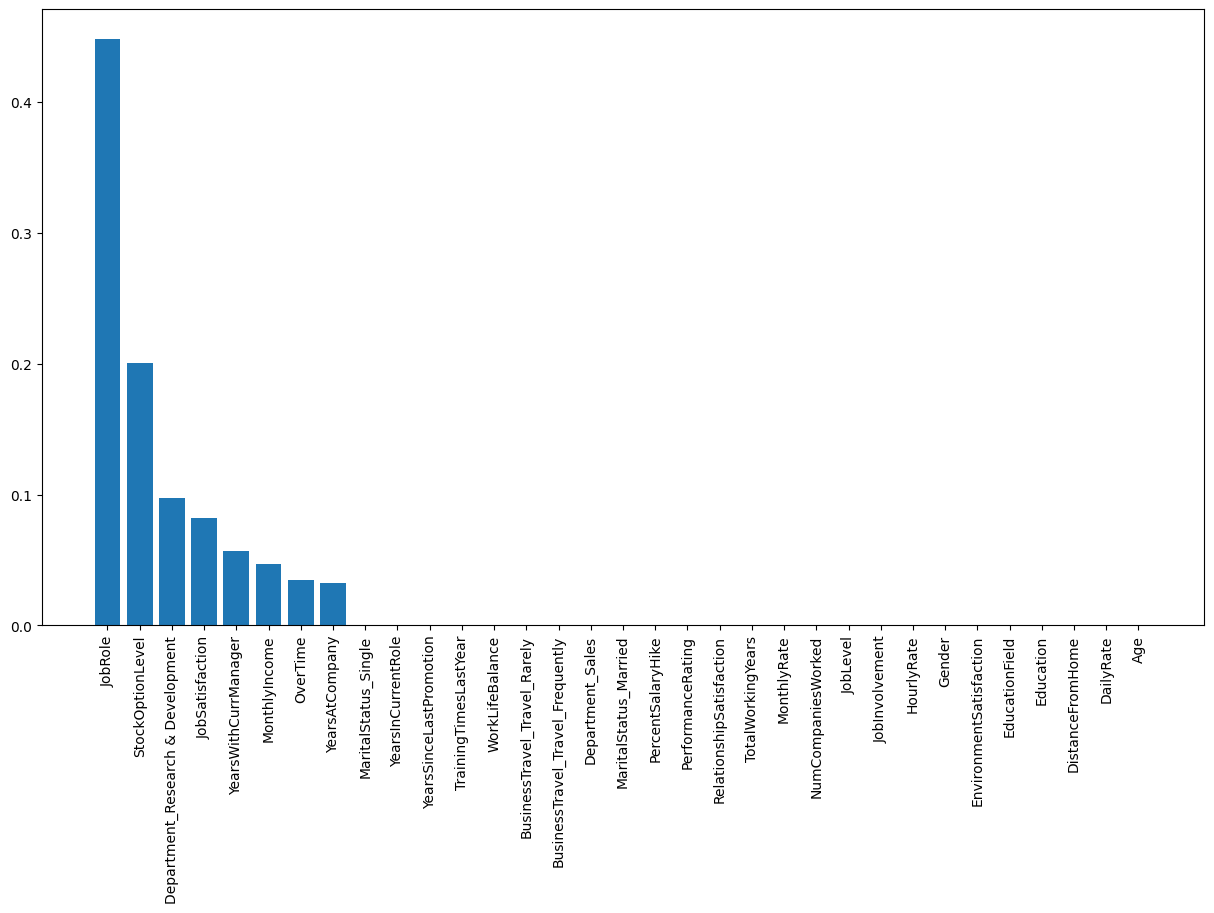

In [31]:
# Feature importances
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1] #sort in desc order
names = [X_train.columns[i] for i in indices]

#plot
plt.figure(figsize=(15,8))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()


We can see that JobRole is the most important feature followed by StockOptionLevel and Department_Research & Development.

### DT for Regression

In [32]:
!gdown 176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO

Downloading...
From: https://drive.google.com/uc?id=176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO
To: /content/regData.csv
100% 13.4k/13.4k [00:00<00:00, 20.6MB/s]


In [33]:
df_r = pd.read_csv('regData.csv')
df_r.head()

,X,Y
0,1,1.018138
1,2,0.813685
2,3,0.795484
3,4,0.860005
4,5,0.990648


In [34]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       600 non-null    int64  
 1   Y       600 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.5 KB


In [35]:
X = df_r['X']
y = df_r['Y']


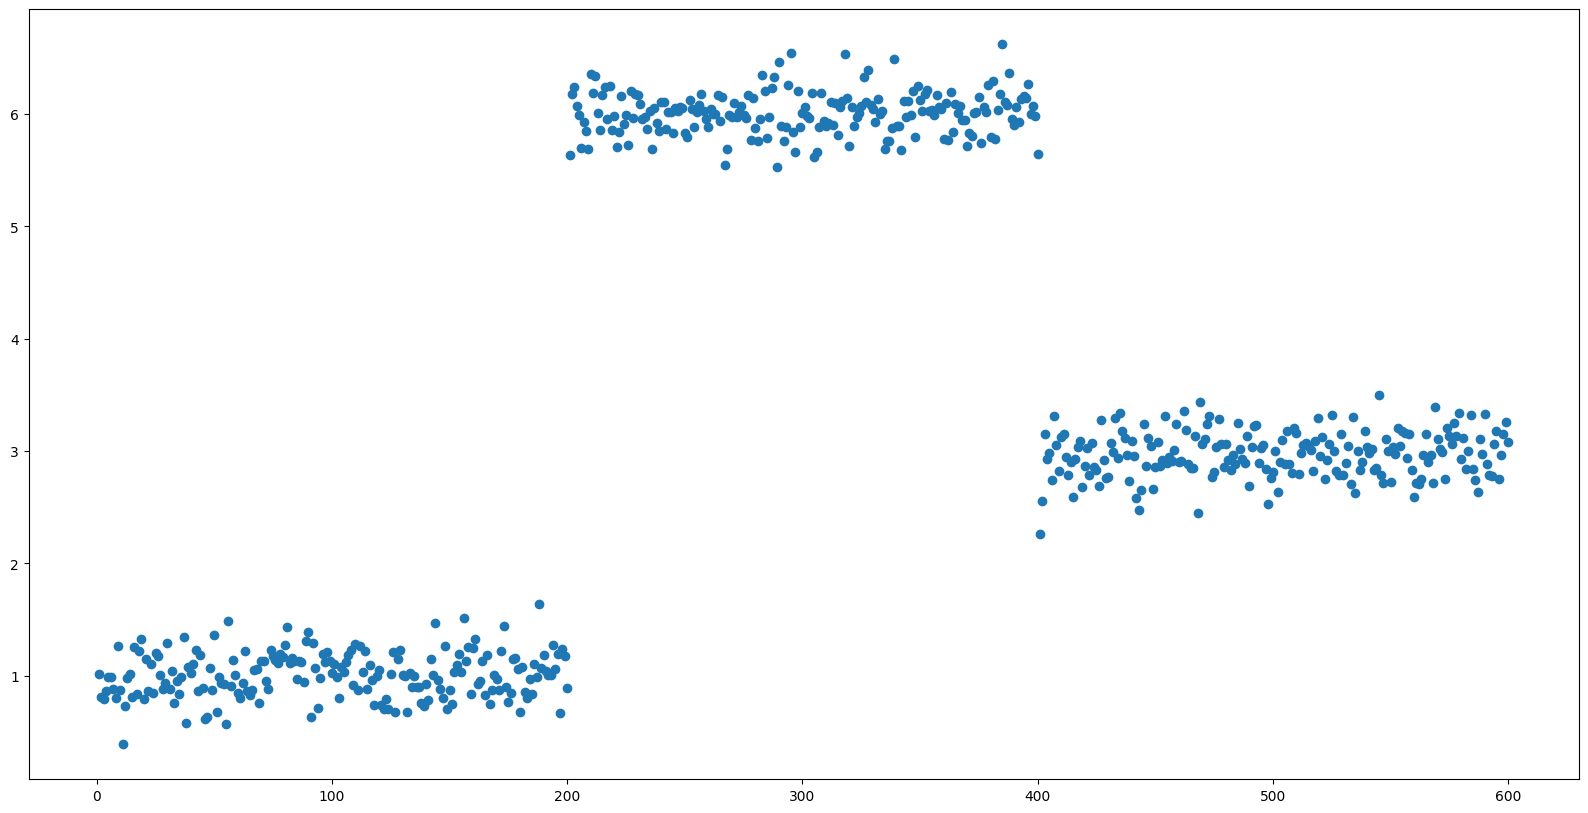

In [38]:
plt.figure(figsize=(20,10))
plt.scatter(X,y)
plt.show()

#### Observations
- data is non linear, linear reg won't work

In [43]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state=42)

X_train = X_train.values.reshape(-1,1)
y_train = y_train.values
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(450, 1) (450,)
(150,) (150,)


In [44]:
from sklearn.tree import DecisionTreeRegressor

depths = [2,3,4,5,6,7,8,9,10]

for depth in depths:
  dtr = DecisionTreeRegressor(random_state=42, max_depth=depth)

  kfold = KFold(n_splits=5)

  cv_score = cross_validate(dtr,X_train, y_train, cv=kfold, scoring='neg_mean_squared_error',return_train_score=True)

  print(f'Depth: {depth}')
  print(f'-ve MSE Mean: Train: {cv_score['train_score'].mean()*100} Validation: {cv_score['test_score'].mean()*100}')
  print('*****************')

Depth: 2
-ve MSE Mean: Train: -3.794157617788399 Validation: -9.146711485144133
*****************
Depth: 3
-ve MSE Mean: Train: -3.5191119186077513 Validation: -9.240291120612005
*****************
Depth: 4
-ve MSE Mean: Train: -3.2645299011431024 Validation: -8.621080064918349
*****************
Depth: 5
-ve MSE Mean: Train: -2.9969150160016667 Validation: -9.112204668083564
*****************
Depth: 6
-ve MSE Mean: Train: -2.6757034240960293 Validation: -9.360359541625083
*****************
Depth: 7
-ve MSE Mean: Train: -2.292229527809341 Validation: -9.735716617852516
*****************
Depth: 8
-ve MSE Mean: Train: -1.9772681258617593 Validation: -9.939972269505324
*****************
Depth: 9
-ve MSE Mean: Train: -1.6295396480515276 Validation: -10.656041790734912
*****************
Depth: 10
-ve MSE Mean: Train: -1.3600919077389448 Validation: -10.920335733890685
*****************
